<a href="https://colab.research.google.com/github/arun4589/Kaggle_competition/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arun4545","key":"d7f43d352032462a540c4afd72d63bff"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 68.8MB/s]


In [5]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('train.csv')

In [8]:
df.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1027,1028,20,RL,71.0,9520,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,293077
1173,1174,50,RL,138.0,18030,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,200500


In [8]:
#OHE->Lotshape,street
#drop->Alley,utilities,lotconfig,landslope,yrsold,yrbuilt,mosold,yearremoveadd,massvnrtype,poolqu,fence ,miscfeature,fireplacequal,ScreenPorch,3snporch,enclosedporch.,openporchsf,wooddecksf,garagetype,garageyrbuilt,
#imputation(mean/med)->MasVnrArea,
#impu(mode)_>bsmtqual,bsmtcond,bsmtexposure,bsmtfintype,bsmtfintypetyp2,electriacal

In [9]:
drop_col=['Alley','Utilities','LotConfig','LandSlope','YrSold','YearBuilt','MoSold','YearRemodAdd','MasVnrType','PoolQC','Fence','MiscFeature','FireplaceQu','ScreenPorch','3SsnPorch',
            'EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageType','GarageYrBlt','GarageCars','GarageCond','LotArea','1stFlrSF','2ndFlrSF','Id','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF',
          ]

In [13]:
len(drop_col)

30

In [34]:
len(cat_col)

32

#EDA

In [14]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Neighborhood,Condition1,Condition2,BldgType,...,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,time,floor_Area,ex_area,porch_area,total_bsmtarea
0,60,RL,65.0,Pave,Reg,Lvl,CollgCr,Norm,Norm,1Fam,...,0,0,WD,Normal,208500,5,1710,8646.0,61,706
1,20,RL,80.0,Pave,Reg,Lvl,Veenker,Feedr,Norm,1Fam,...,0,0,WD,Normal,181500,31,1262,9600.0,298,978
2,60,RL,68.0,Pave,IR1,Lvl,CollgCr,Norm,Norm,1Fam,...,0,0,WD,Normal,223500,7,1786,11412.0,42,486
3,70,RL,60.0,Pave,IR1,Lvl,Crawfor,Norm,Norm,1Fam,...,0,0,WD,Abnorml,140000,91,1717,9550.0,307,216
4,60,RL,84.0,Pave,IR1,Lvl,NoRidge,Norm,Norm,1Fam,...,0,0,WD,Normal,250000,8,2198,14610.0,276,655


In [10]:
df['time']=df['YrSold']-df['YearBuilt']
df['floor_Area']=df['1stFlrSF']+df['2ndFlrSF']
df['ex_area']=df['LotArea']+df['MasVnrArea']
df['porch_area']=df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']
df['total_bsmtarea']=df['TotalBsmtSF']-df['BsmtUnfSF']

In [11]:
df=df.drop(columns=drop_col)

In [12]:
df.shape

(1460, 56)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,FireplaceQu,GarageType,GarageYrBlt,GarageFinish
100,TA,Attchd,1977.0,RFn
101,TA,Attchd,1985.0,Fin
102,NaN,Attchd,1979.0,Unf
103,NaN,Attchd,2009.0,RFn
104,TA,Detchd,1951.0,Unf
...,...,...,...,...
195,TA,Attchd,1976.0,Unf
196,Gd,Attchd,2007.0,Fin
197,Ex,Detchd,1918.0,Unf
198,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df.isnull().mean()*100

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [ ]:
df.duplicated().sum()

0

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

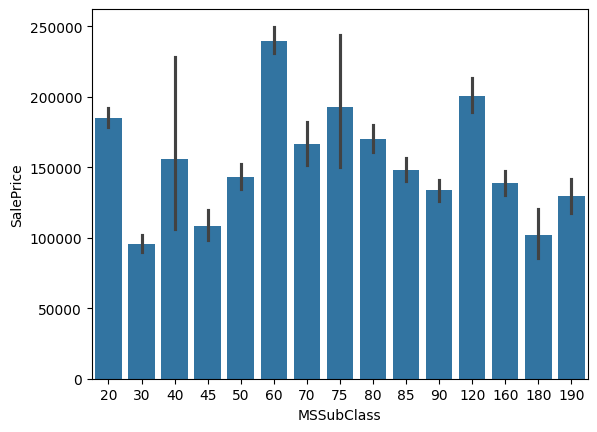

In [ ]:
sns.barplot(x=df['MSSubClass'],y=df['SalePrice'])

In [ ]:
df['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


<Axes: xlabel='MSZoning', ylabel='SalePrice'>

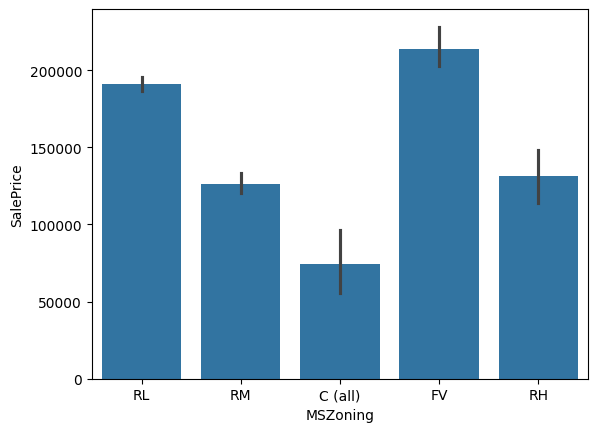

In [ ]:
sns.barplot(x=df['MSZoning'],y=df['SalePrice'])

In [ ]:
X=pd.read_csv('test.csv')

In [10]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
ode=OrdinalEncoder(categories=[['C (all)','RM','RH','RL','FV']])

In [ ]:
df['MSZoning']=ode.fit_transform(df[['MSZoning']])

#3

In [ ]:
df.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
15,16,45,1.0,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
836,837,30,1.0,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,COD,Normal,153500


<Axes: xlabel='LotFrontage', ylabel='Density'>

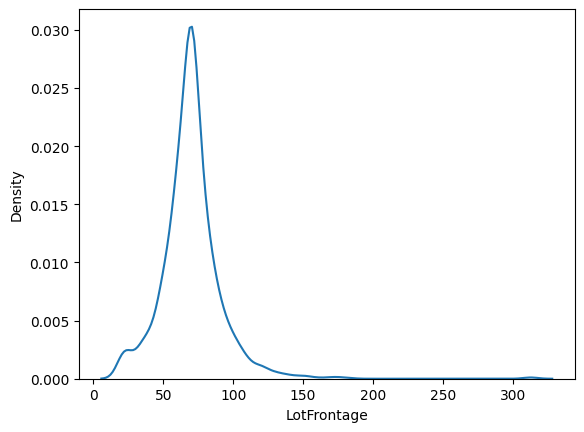

In [ ]:
sns.kdeplot(df['LotFrontage'])


In [ ]:
knn=KNNImputer(n_neighbors=4,weights='distance')



In [ ]:
df=df.drop(columns=['LotFrontage_1'])

In [ ]:
df['LotFrontage']=knn.fit_transform(df[['LotFrontage']])

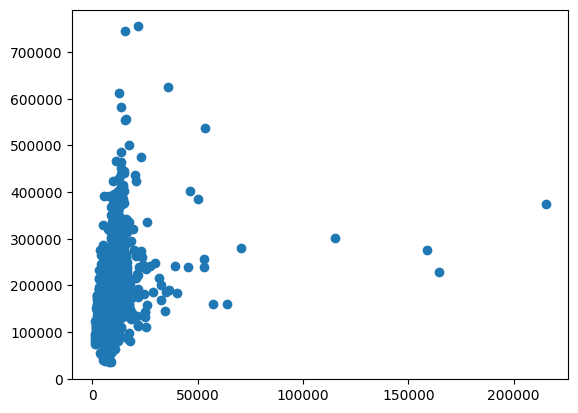

In [ ]:
plt.scatter(df['LotArea'],df['SalePrice'])

In [ ]:
df['LotArea']=np.log(df['LotArea'])

<Axes: xlabel='LotArea', ylabel='Density'>

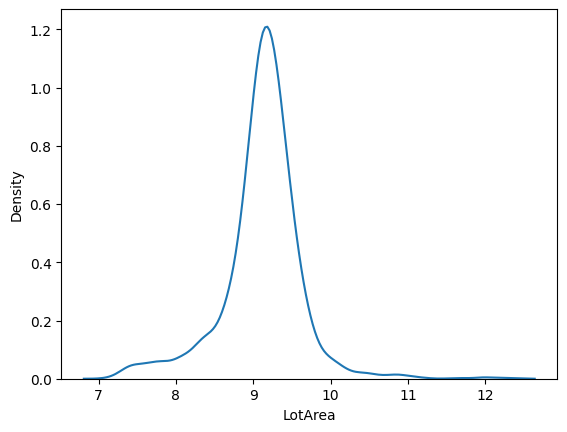

In [ ]:
sns.kdeplot(df['LotArea'])

<Axes: xlabel='Street', ylabel='SalePrice'>

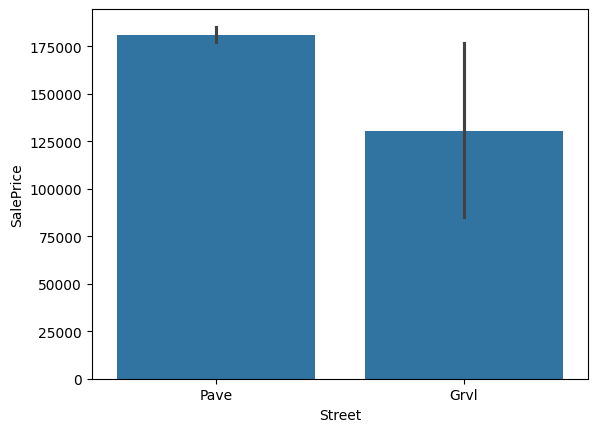

In [ ]:
sns.barplot(x=df['Street'],y=df['SalePrice'])

In [ ]:
df['Street'].isnull().sum()

0

In [ ]:
df.shape

(1460, 80)

In [ ]:
ohe=OneHotEncoder(sparse_output=False)
df['Street']=ohe.fit_transform(df[['Street']])

In [ ]:
df=df.drop(columns=['Alley'])

#4

In [ ]:
df['LotShape'].value_counts()

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


<Axes: xlabel='LotShape', ylabel='SalePrice'>

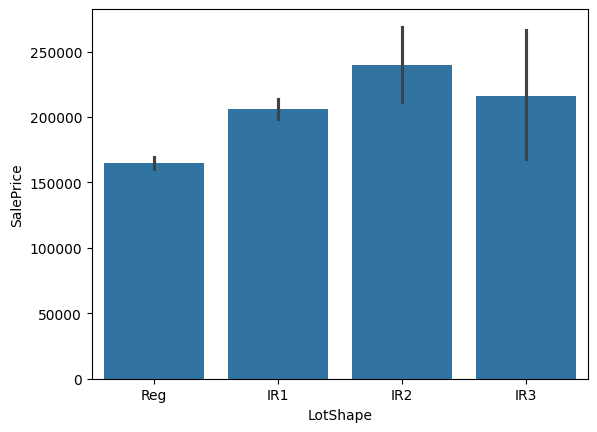

In [ ]:
sns.barplot(x=df['LotShape'],y=df['SalePrice'])

<Axes: >

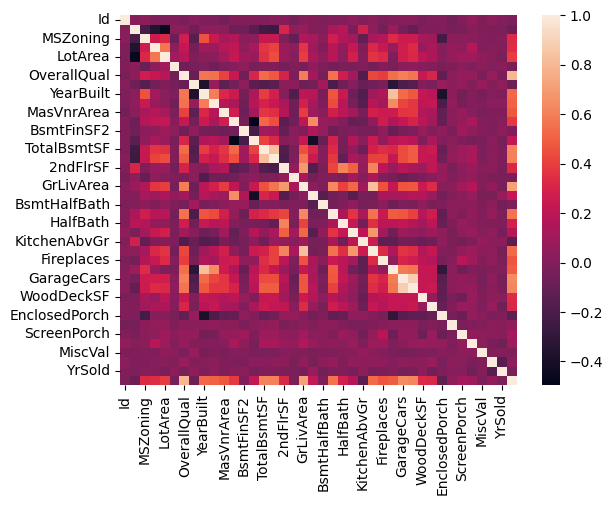

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
df['LandContour'].value_counts()

,count
LandContour,
1.0,1311
0.0,63
3.0,50
2.0,36


<Axes: xlabel='LandContour', ylabel='SalePrice'>

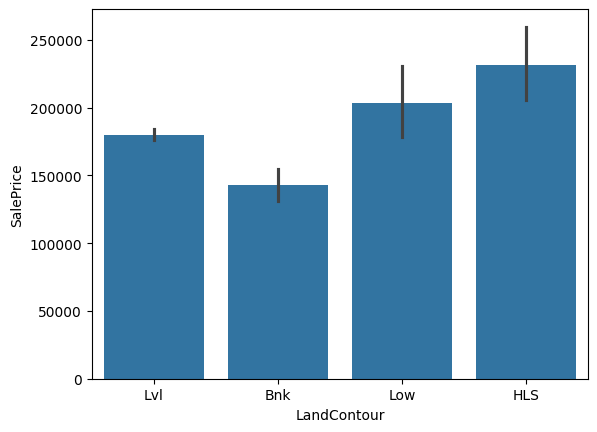

In [ ]:
sns.barplot(x=df['LandContour'],y=df['SalePrice'])

In [ ]:
ode1=OrdinalEncoder(categories=[['Bnk','Lvl','Low','HLS']])
df['LandContour']=ode1.fit_transform(df[['LandContour']])

In [ ]:
df['Utilities'].value_counts()

,count
Utilities,
AllPub,1459
NoSeWa,1


In [ ]:
df['LotConfig'].value_counts()

,count
LotConfig,
Inside,1052
Corner,263
CulDSac,94
FR2,47
FR3,4


<Axes: xlabel='LotConfig', ylabel='SalePrice'>

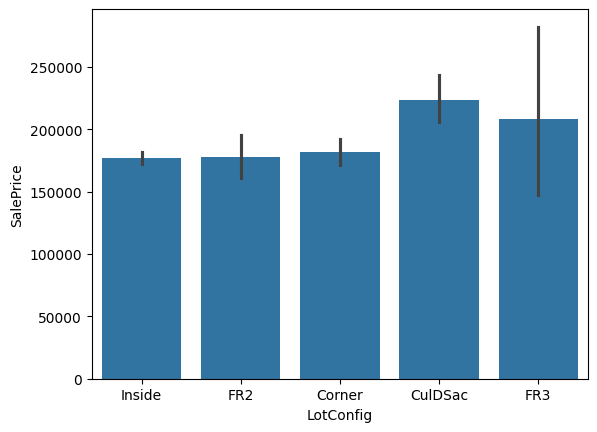

In [ ]:
sns.barplot(x=df['LotConfig'],y=df['SalePrice'])

In [ ]:
df['LandSlope'].value_counts()

,count
LandSlope,
Gtl,1382
Mod,65
Sev,13


<Axes: xlabel='LandSlope', ylabel='SalePrice'>

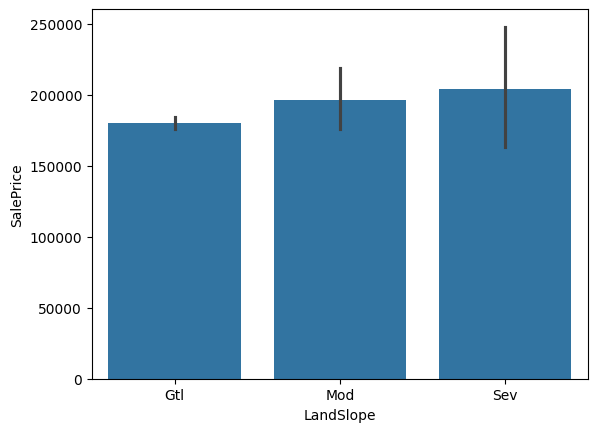

In [ ]:
sns.barplot(x=df['LandSlope'],y=df['SalePrice'])

In [ ]:
df['Neighborhood'].value_counts()

,count
Neighborhood,
1,364
NAmes,225
2,143
OldTown,113
Edwards,100
Gilbert,79
Sawyer,74
NWAmes,73
SawyerW,59


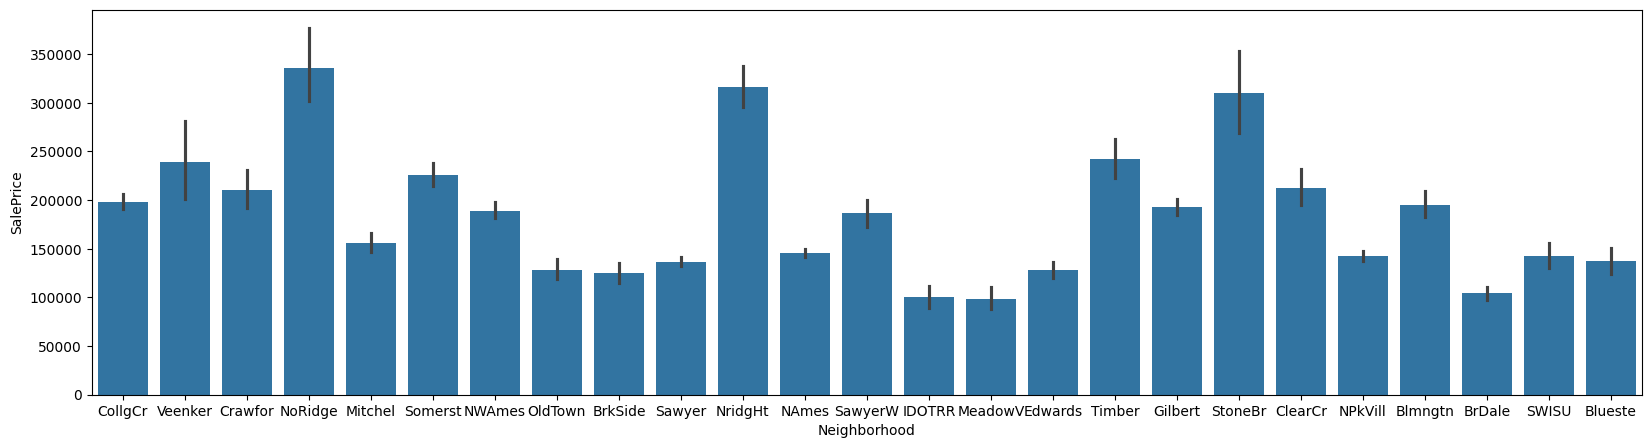

In [11]:
figsize=(20,5)
plt.figure(figsize=figsize)

sns.barplot(x=df['Neighborhood'],y=df['SalePrice'])
plt.show()


In [ ]:
df[df['Neighborhood']=='NoRidge']=2
df[df['Neighborhood']=='NridgHt']=2
df[df['Neighborhood']=='StoneBr']=2
df[df['Neighborhood']=='Veenker']=1
df[df['Neighborhood']=='Timber']=1
df[df['Neighborhood']=='Somerst']=1
df[df['Neighborhood']=='Crawfor']=1
df[df['Neighborhood']=='ClearCr']=1
df[df['Neighborhood']=='CollgCr']=1

In [ ]:
df['Neighborhood'].unique()

array([1, 2, 'Mitchel', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Gilbert', 'NPkVill',
       'Blmngtn', 'BrDale', 'SWISU', 'Blueste'], dtype=object)

In [ ]:
catgo=[ 'Mitchel', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Gilbert', 'NPkVill',
       'Blmngtn', 'BrDale', 'SWISU', 'Blueste']

In [ ]:
df['Neighborhood']=df['Neighborhood'].replace(catgo,0)

<ipython-input-173-979d94b15122>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Neighborhood']=df['Neighborhood'].replace(catgo,0)


In [ ]:
df['Neighborhood'].value_counts()

,count
Neighborhood,
0,953
1,364
2,143


#5

In [ ]:
df['Condition1'].value_counts()

,count
Condition1,
Norm,774
1,364
2,143
Feedr,71
Artery,48
RRAn,22
PosN,15
RRAe,11
PosA,7


In [ ]:
df['Condition2'].value_counts()

,count
Condition2,
Norm,939
1,364
2,143
Feedr,6
Artery,2
RRNn,2
PosN,1
PosA,1
RRAn,1


In [15]:
col=df.columns

In [16]:
col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'LotShape',
       'LandContour', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish',
       'GarageArea', 'GarageQual', 'PavedDrive', 'PoolArea', 'MiscVal',
       'SaleType', 'SaleCondition', 'SalePrice', 'time', 'floor_Area',
       'ex_area', 'porch_area', 'total_bsmtarea'],
      dtype='object')

In [17]:
cat_col=df.select_dtypes(include='object').columns

In [18]:
num_col=df.select_dtypes(include=['int64','float64']).columns

In [19]:
print((cat_col))
(num_col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'PoolArea', 'MiscVal', 'SalePrice', 'time',
       'floor_Area', 'ex_area', 'porch_area', 'total_bsmtarea'],
      dtype='object')

In [54]:
num_col=num_col.drop('SalePrice')

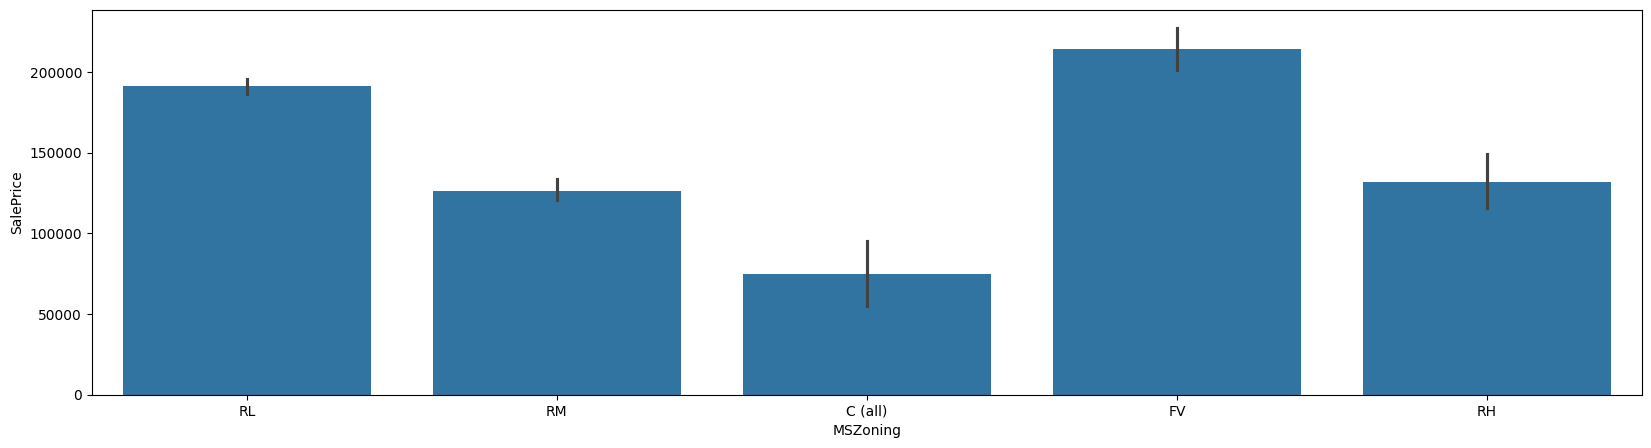

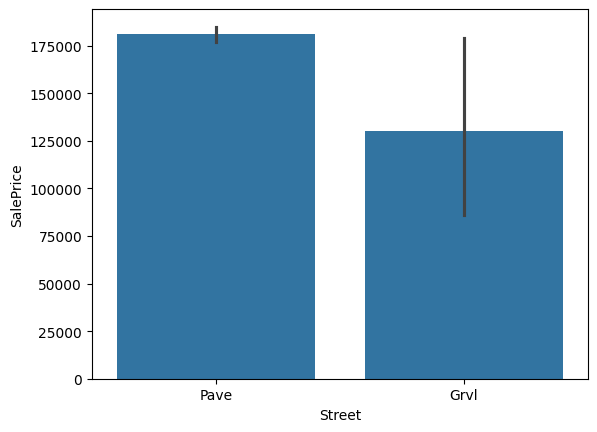

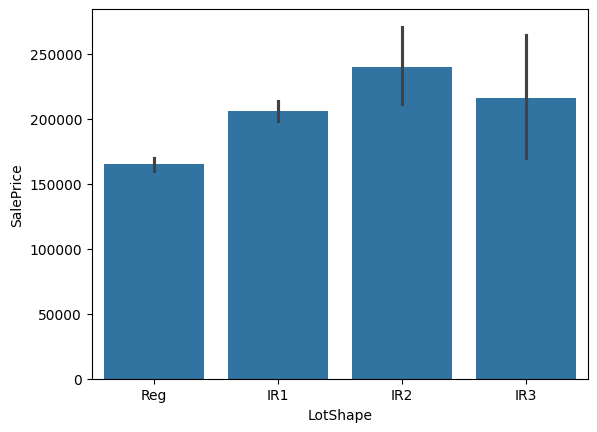

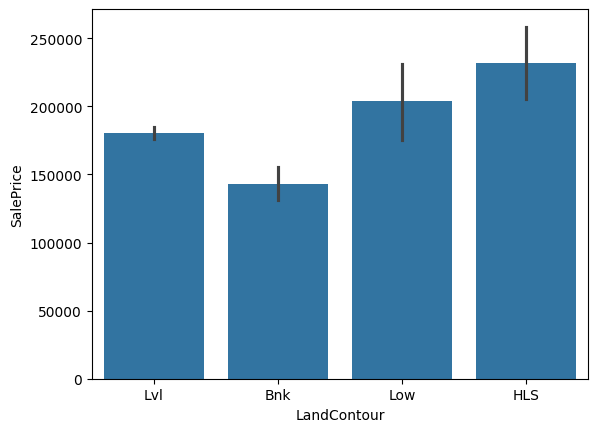

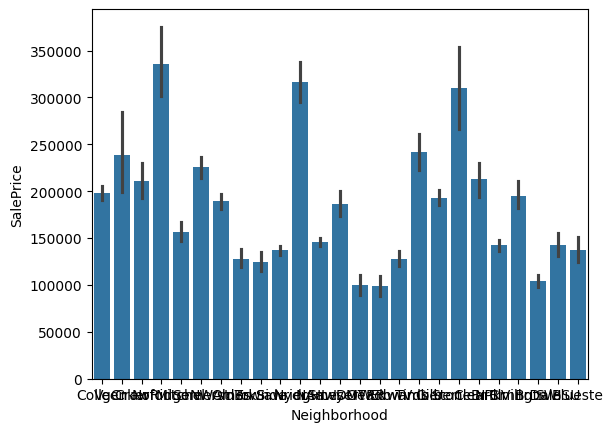

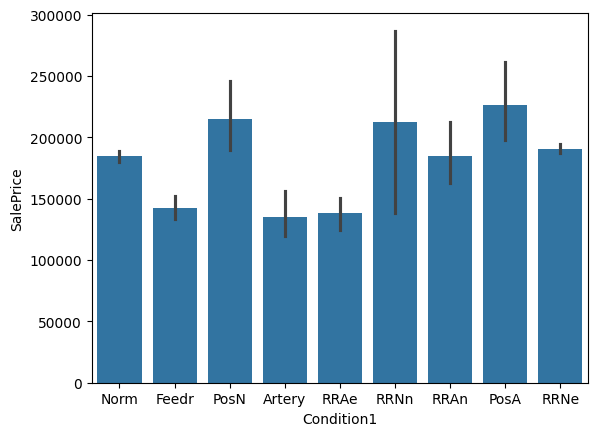

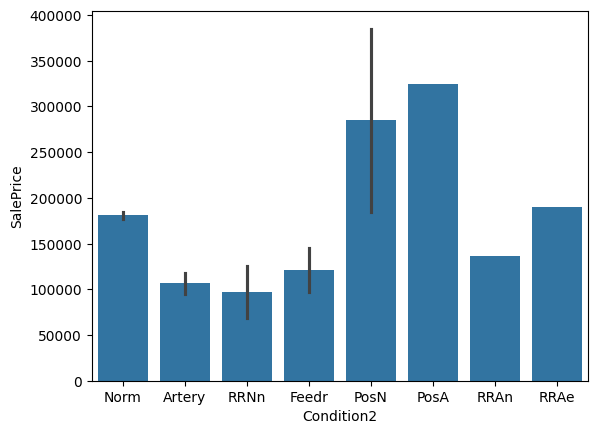

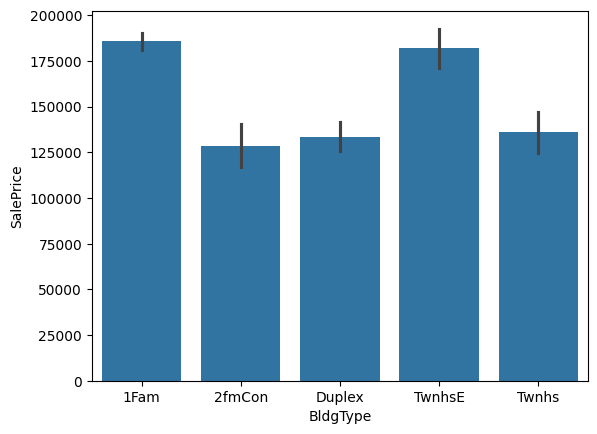

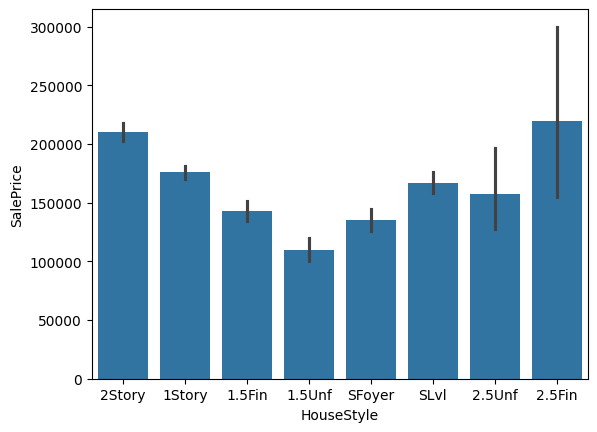

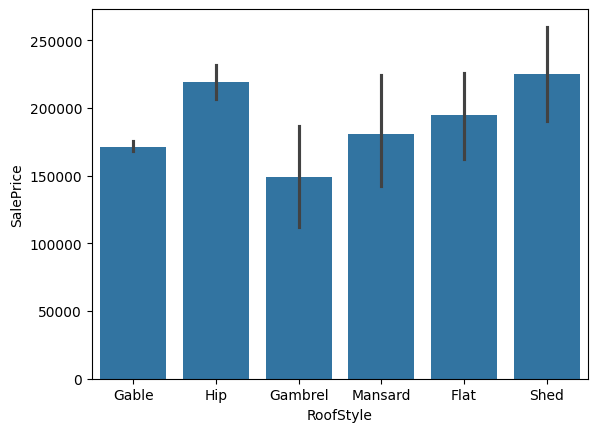

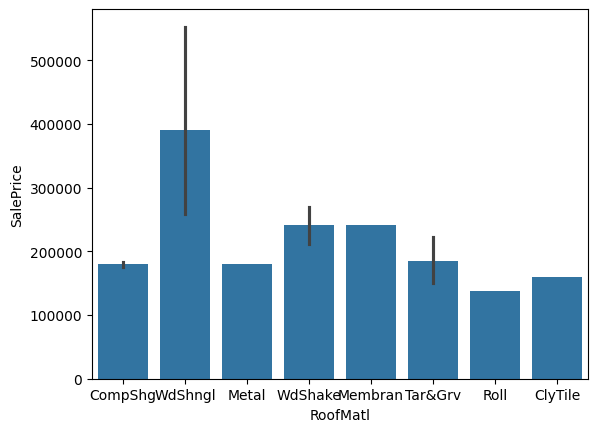

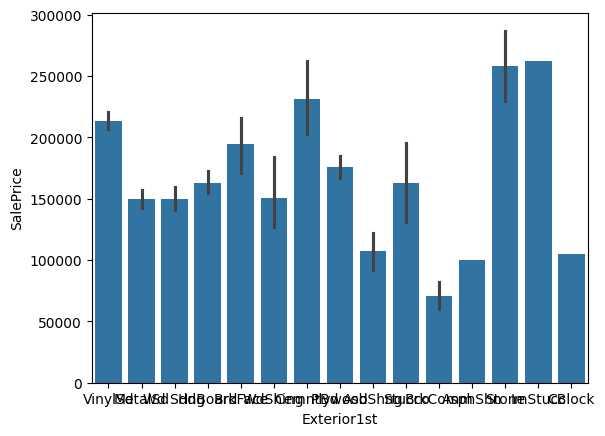

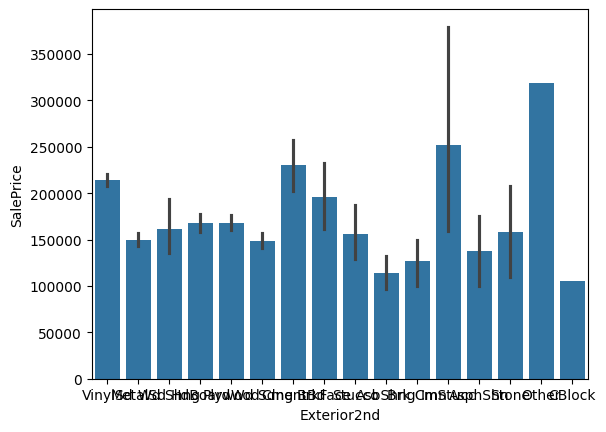

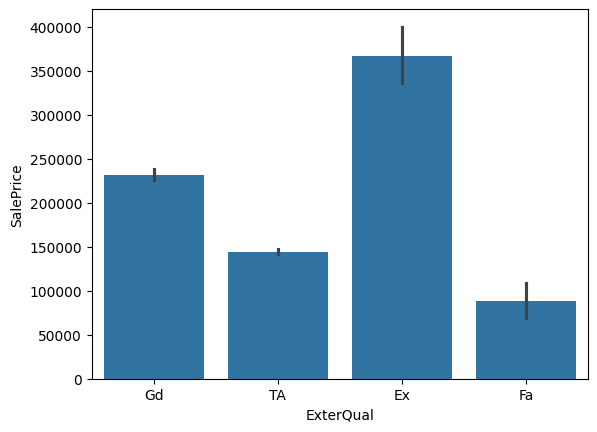

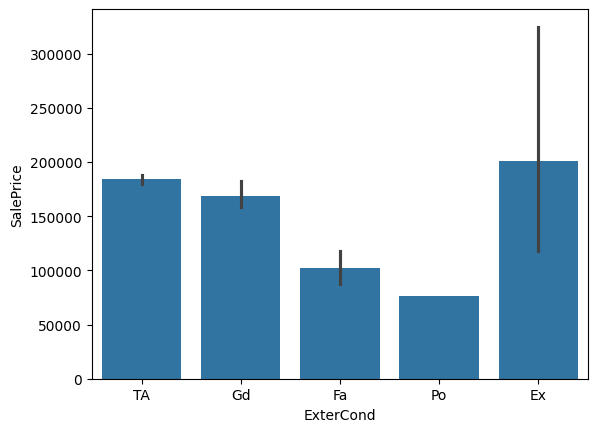

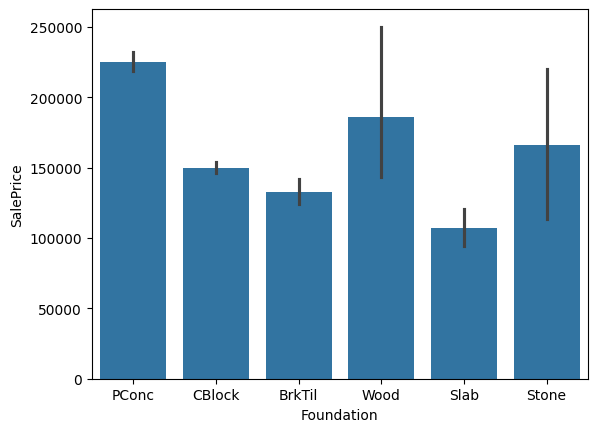

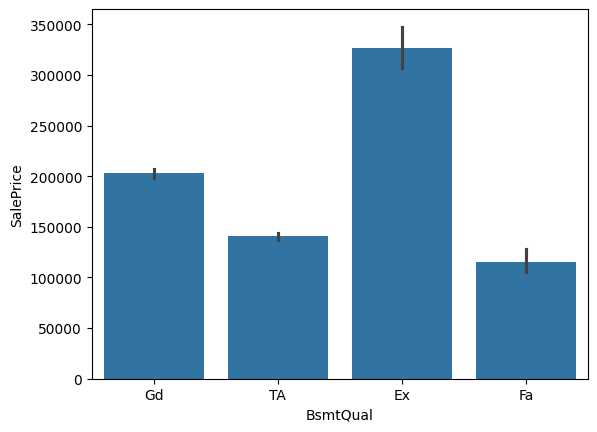

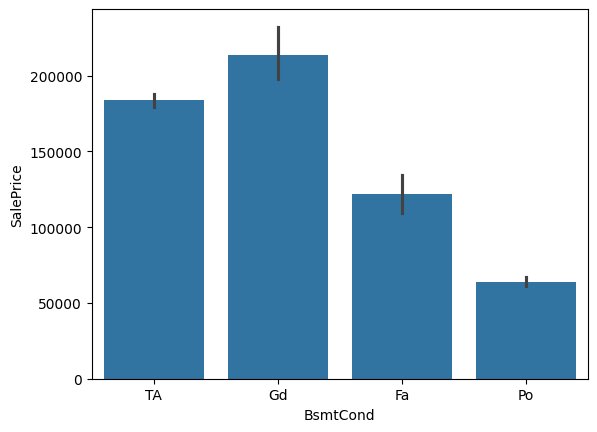

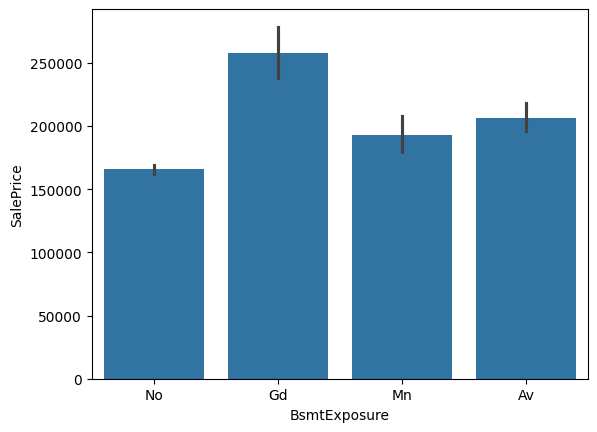

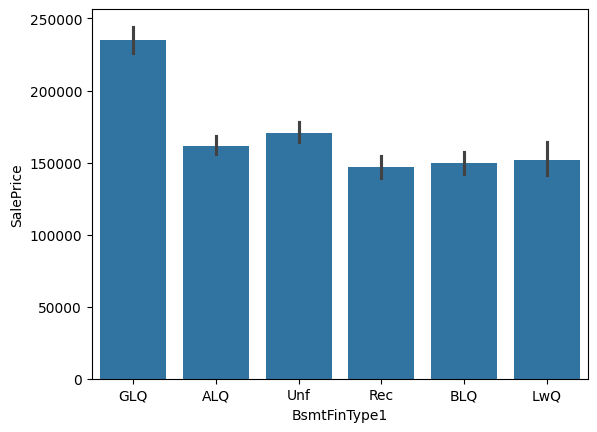

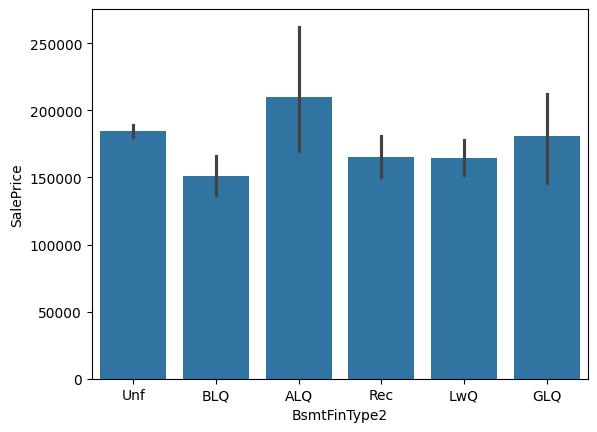

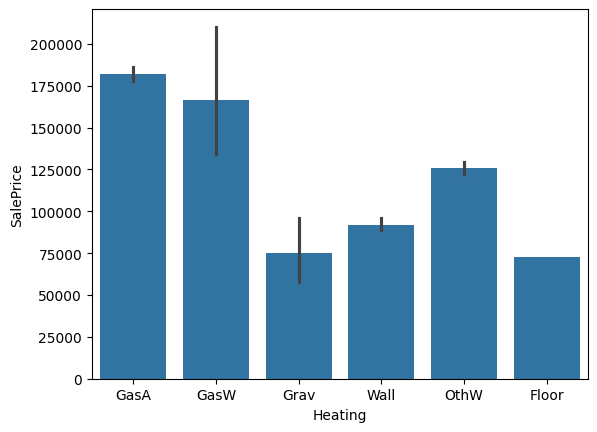

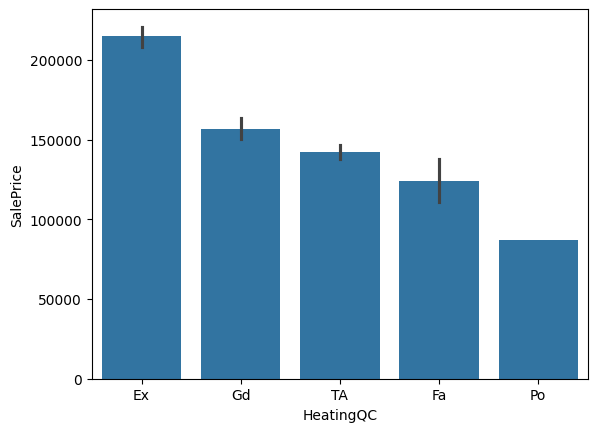

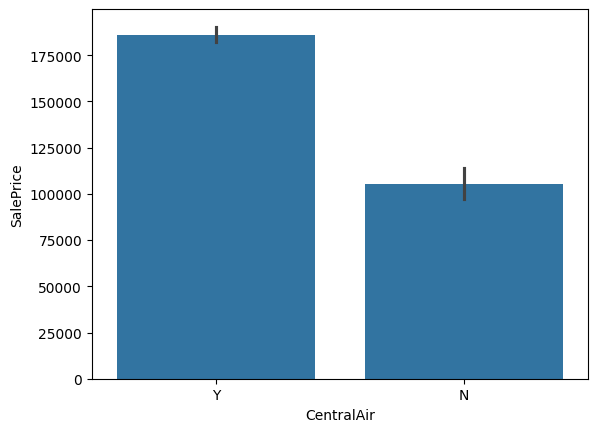

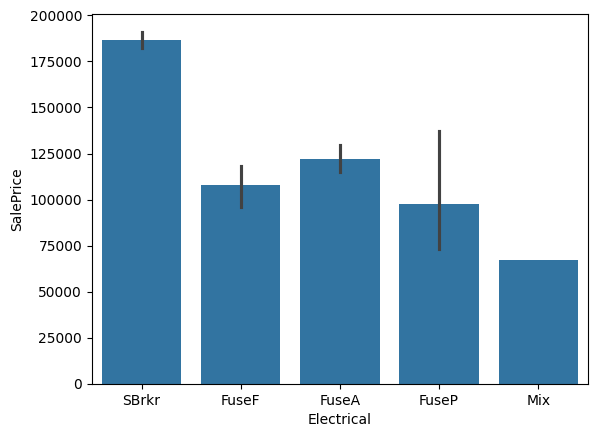

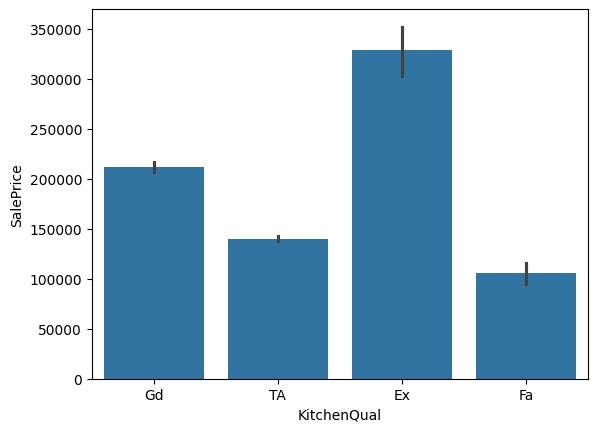

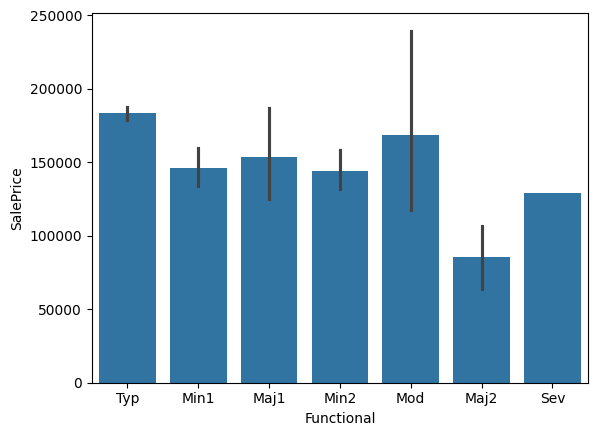

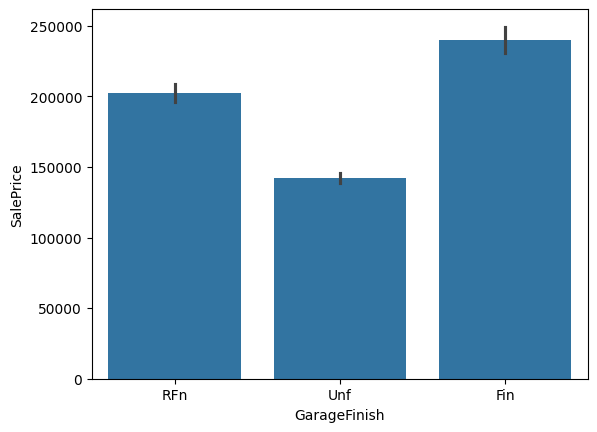

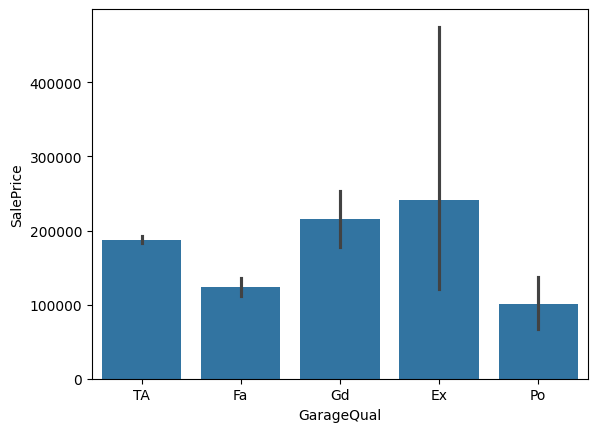

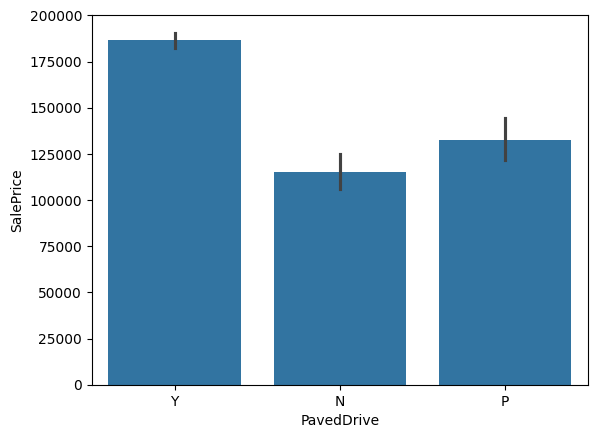

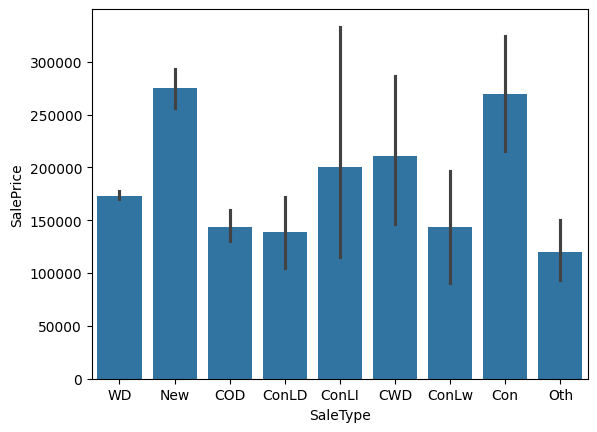

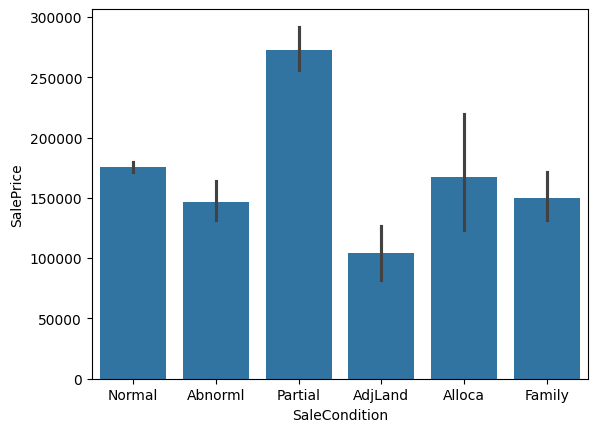

In [25]:
figsize=(20,5)
plt.figure(figsize=figsize)
for i in cat_col:
  # plt.title(i)
  sns.barplot(x=df[i],y=df['SalePrice'])
  plt.show()


#6

In [27]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['ex_area']=df['ex_area'].fillna(df['ex_area'].mean())



In [30]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
  df[col]=df[col].fillna('None')

In [31]:
for col in ('GarageFinish','GarageQual'):
  df[col]=df[col].fillna('None')

In [32]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   Street          1460 non-null   object 
 4   LotShape        1460 non-null   object 
 5   LandContour     1460 non-null   object 
 6   Neighborhood    1460 non-null   object 
 7   Condition1      1460 non-null   object 
 8   Condition2      1460 non-null   object 
 9   BldgType        1460 non-null   object 
 10  HouseStyle      1460 non-null   object 
 11  OverallQual     1460 non-null   int64  
 12  OverallCond     1460 non-null   int64  
 13  RoofStyle       1460 non-null   object 
 14  RoofMatl        1460 non-null   object 
 15  Exterior1st     1460 non-null   object 
 16  Exterior2nd     1460 non-null   object 
 17  MasVnrArea      1460 non-null   f

In [35]:
y=df['SalePrice']

In [38]:
x=df.drop(columns=['SalePrice'])

In [39]:
x.shape

(1460, 55)

In [42]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [64]:
from sklearn.pipeline import Pipeline ##it stepwise perform automate process
from sklearn.impute import SimpleImputer  ## handle missing values automatically
from sklearn.preprocessing import StandardScaler,RobustScaler ## for scaling of data
from sklearn.preprocessing import OneHotEncoder ## convert text to numeric data(encoding)
from sklearn.compose import ColumnTransformer## combining various pipeline

In [65]:
num_pip=Pipeline(
    steps=[
        # ('impute',SimpleImputer(strategy='median')), ##handeled missing values by use of median
        ('scaler',RobustScaler()) ## scaling
    ]
)
cat_pip=Pipeline(
    steps=[
        # ('impute',SimpleImputer(strategy='most_frequent')), ##handeled missing values by use of mode
        ('encode',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')) ## convert text to numeric data
    ]

)

In [66]:
processor=ColumnTransformer(
    [
        ('num_pipe',num_pip,num_col), ## applyies on numeric data
        ('cat_pipe',cat_pip,cat_col)  ##applies to text data
    ]
)

In [67]:
x_train_tr=processor.fit_transform(x_train)
x_test_tr=processor.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV


In [69]:
from xgboost import XGBRegressor


In [73]:
!pip install lightgbm
from lightgbm import LGBMRegressor

In [78]:
grb=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =42)
grb.fit(x_train_tr,y_train)
y_pred_grb=grb.predict(x_test_tr)
print(np.sqrt(mean_squared_error(y_test,y_pred_grb)))

29882.17253431336


In [79]:
xgb=XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)
xgb.fit(x_train_tr,y_train)
y_pred_xgb=xgb.predict(x_test_tr)
print(np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:54:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


33983.056484077475


In [80]:
lgb=LGBMRegressor(objective='regression',
                                       num_leaves=4,
                                       learning_rate=0.01,
                                       n_estimators=5000,
                                       max_bin=200,
                                       bagging_fraction=0.75,
                                       bagging_freq=5,
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7)
lgb.fit(x_train_tr,y_train)
y_pred_lgb=lgb.predict(x_test_tr)
print(np.sqrt(mean_squared_error(y_test,y_pred_lgb)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1855
[LightGBM] [Info] Number of data point

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [81]:

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [107]:
from mlxtend.regressor import StackingCVRegressor

In [122]:
def blend_models_predict(X):
    return (


            (0.4 * grb.predict(X)) + \
            (0.3 * xgb.predict(X)) + \
            (0.3 * lgb.predict(X))
                                         )

In [85]:
X=pd.read_csv('test.csv')

In [86]:
sub=X['Id']

In [87]:
X['time']=X['YrSold']-X['YearBuilt']
X['floor_Area']=X['1stFlrSF']+X['2ndFlrSF']
X['ex_area']=X['LotArea']+X['MasVnrArea']
X['porch_area']=X['WoodDeckSF']+X['OpenPorchSF']+X['EnclosedPorch']+X['3SsnPorch']+X['ScreenPorch']
X['total_bsmtarea']=X['TotalBsmtSF']-X['BsmtUnfSF']

In [90]:
X['LotFrontage']=X['LotFrontage'].fillna(X['LotFrontage'].median())
X['MasVnrArea']=X['MasVnrArea'].fillna(X['MasVnrArea'].mean())
X['ex_area']=X['ex_area'].fillna(df['ex_area'].mean())

for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
  X[col]=X[col].fillna('None')

for col in ('GarageFinish','GarageQual'):
  X[col]=X[col].fillna('None')




In [93]:
X['MSZoning']=X['MSZoning'].fillna('FV')

In [95]:
X['Exterior1st']=X['Exterior1st'].fillna('VinylSd')
X['Exterior2nd']=X['Exterior2nd'].fillna('VinylSd')

In [97]:
X['BsmtFullBath']=X['BsmtFullBath'].fillna(X['BsmtFullBath'].median())
X['BsmtHalfBath']=X['BsmtHalfBath'].fillna(X['BsmtHalfBath'].median())

In [99]:
X['Functional']=X['Functional'].fillna('Typ')

In [105]:
X['KitchenQual']=X['KitchenQual'].fillna('Ex')

In [101]:
X['GarageArea']=X['GarageArea'].fillna(X['GarageArea'].mean())

In [102]:
X['SaleType']=X['SaleType'].fillna('WD')

In [103]:
X['total_bsmtarea']=X['total_bsmtarea'].fillna(X['total_bsmtarea'].mean())

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1459 non-null   int64  
 1   MSZoning        1459 non-null   object 
 2   LotFrontage     1459 non-null   float64
 3   Street          1459 non-null   object 
 4   LotShape        1459 non-null   object 
 5   LandContour     1459 non-null   object 
 6   Neighborhood    1459 non-null   object 
 7   Condition1      1459 non-null   object 
 8   Condition2      1459 non-null   object 
 9   BldgType        1459 non-null   object 
 10  HouseStyle      1459 non-null   object 
 11  OverallQual     1459 non-null   int64  
 12  OverallCond     1459 non-null   int64  
 13  RoofStyle       1459 non-null   object 
 14  RoofMatl        1459 non-null   object 
 15  Exterior1st     1459 non-null   object 
 16  Exterior2nd     1459 non-null   object 
 17  MasVnrArea      1459 non-null   f

In [91]:
X=X.drop(columns=drop_col)

In [112]:
x=processor.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [129]:
y=blend_models_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [131]:
y.shape

(1459,)

In [134]:
sub=sub.iloc[:1459]

In [135]:
sub=pd.DataFrame({'Id':sub,'SalePrice':y})

In [136]:
sub.head()

,Id,SalePrice
0,1461,126624.954167
1,1462,164619.069082
2,1463,188456.601802
3,1464,200851.173250
4,1465,179807.034943


In [137]:
sub.to_csv('submission.csv',index=False)